In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import mudata
import anndata
import scanpy as sc
import pandas as pd
import numpy as np

from typing import List, Dict, Union

In [3]:
adata = sc.datasets.pbmc3k_processed()
# adata2 = sc.datasets.blobs(n_observations=10000, n_centers=12, n_variables=500)

In [4]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [5]:
## Make DataFrame assigning cells to views
assign_dict = {
    'myeloid':['CD14+ Monocytes', 'FCGR3A+ Monocytes', 'Dendritic cells', 'Megakaryocytes'],
    'lymphoid':['NK cells', "CD8 T cells", 'CD4 T cells', 'B cells'],
    'NKT cells':['NK cells', "CD8 T cells", 'CD4 T cells'],
    'T cells':["CD8 T cells", 'CD4 T cells'],
    'B cells':['B cells']
}
annotation_col = 'louvain'

# for k in assign_dict.keys():
assign_tab = np.vstack([np.where(adata.obs[annotation_col].isin(assign_dict[k]), 1, 0) for k in assign_dict.keys()]).T
assign_tab = pd.DataFrame(assign_tab, columns = assign_dict.keys(), index = adata.obs_names)
assign_tab

,myeloid,lymphoid,NKT cells,T cells,B cells
index,,,,,
AAACATACAACCAC-1,0,1,1,1,0
AAACATTGAGCTAC-1,0,1,0,0,1
AAACATTGATCAGC-1,0,1,1,1,0
AAACCGTGCTTCCG-1,1,0,0,0,0
AAACCGTGTATGCG-1,0,1,1,0,0
...,...,...,...,...,...
TTTCGAACTCTCAT-1,1,0,0,0,0
TTTCTACTGAGGCA-1,0,1,0,0,1
TTTCTACTTCCTCG-1,0,1,0,0,1


In [6]:
## Make dictionary of parent-child structure of views
view_hierarchy = {
    'myeloid':None,
    'lymphoid':{
        "NKT cells":{
            'T cells':None
        },
        "B cells":None}
}

In [7]:
# ## small tests
# broken_assign_tab = assign_tab.copy()
# broken_assign_tab['T cells'] = broken_assign_tab['T cells'].sample(frac=1).values
# _clean_view_assingment(broken_assign_tab, view_hierarchy)

# assign_tab['ciaone'] = broken_assign_tab['T cells'].sample(frac=1).values
# _clean_view_assingment(assign_tab, view_hierarchy)

### Make MuData of hierarchical structure

In [192]:
import multi_view_atlas as mva

In [193]:
mva.tl.MultiViewAtlas(mdata)

MultiViewAtlas object with view hierarchy:
	lymphoid:
	  B cells: null
	  NKT cells:
	    T cells: null
	myeloid: null
	
MuData object with n_obs × n_vars = 2638 × 1838
  obsm:	'view_assign'
  6 modalities
    full:	2638 x 1838
      obs:	'n_genes', 'percent_mito', 'n_counts', 'louvain'
      var:	'n_cells'
      uns:	'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'view_hierarchy'
      obsm:	'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr', 'view_assign'
      varm:	'PCs'
      obsp:	'distances', 'connectivities'
    myeloid:	682 x 0
      obs:	'n_genes', 'percent_mito', 'n_counts', 'louvain'
      obsm:	'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr', 'view_assign'
    lymphoid:	1956 x 0
      obs:	'n_genes', 'percent_mito', 'n_counts', 'louvain'
      obsm:	'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr', 'view_assign'
    NKT cells:	1614 x 0
      obs:	'n_genes', 'percent_mito', 'n_counts', 'louvain'
      obsm:	'X_pca', 'X_tsne', 'X_umap', 'X_draw_

In [158]:
mvatlas['full'].uns['view_hierarchy'] 

{'myeloid': None,
 'lymphoid': {'NKT cells': {'T cells': None}, 'B cells': None}}

In [159]:
adata.obsm['view_assign'] = assign_tab.copy()
adata.uns['view_hierarchy'] = view_hierarchy.copy()

mvatlas = mva.tl.MultiViewAtlas(adata)
mvatlas
    # [np.where(np.array(s.split('.')) == v)[0][0]  if v in s]

/home/jovyan/my-conda-envs/patho-signatures-2/lib/python3.9/site-packages/mudata/_core/mudata.py:569: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col
/home/jovyan/my-conda-envs/patho-signatures-2/lib/python3.9/site-packages/mudata/_core/mudata.py:569: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col


MultiViewAtlas object with view hierarchy:
	lymphoid:
	  B cells: null
	  NKT cells:
	    T cells: null
	myeloid: null
	MuData object with n_obs × n_vars = 2638 × 1838
  6 modalities
    full:	2638 x 1838
      obs:	'n_genes', 'percent_mito', 'n_counts', 'louvain'
      var:	'n_cells'
      uns:	'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'view_hierarchy'
      obsm:	'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr', 'view_assign'
      varm:	'PCs'
      obsp:	'distances', 'connectivities'
    myeloid:	682 x 0
      obs:	'n_genes', 'percent_mito', 'n_counts', 'louvain'
      obsm:	'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr', 'view_assign'
    lymphoid:	1956 x 0
      obs:	'n_genes', 'percent_mito', 'n_counts', 'louvain'
      obsm:	'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr', 'view_assign'
    NKT cells:	1614 x 0
      obs:	'n_genes', 'percent_mito', 'n_counts', 'louvain'
      obsm:	'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr', 'view_assign

In [171]:
mdata = mvatlas.mdata.copy()
# mdata = data
assert 'full' in mdata.mod.keys()
if 'view_hierarchy' not in mdata.uns:
    try:
        mdata.uns['view_hierarchy'] = mdata['full'].uns['view_hierarchy']
    except:
        raise ValueError("mdata must contain dictionary of view hierarchy in uns['view_hierarchy']")

_clean_view_assignment(mdata['full'])




/home/jovyan/my-conda-envs/patho-signatures-2/lib/python3.9/site-packages/mudata/_core/mudata.py:569: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col
/home/jovyan/my-conda-envs/patho-signatures-2/lib/python3.9/site-packages/mudata/_core/mudata.py:569: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col


NameError: name '_clean_view_assignment' is not defined

In [183]:
# {k:v.obs_names.isin(mdata['full'].obs_names).astype('int') for k,v in mdata.mod.items()}

In [185]:
view_assign.astype('int')

,myeloid,lymphoid,NKT cells,T cells,B cells
index,,,,,
AAACATACAACCAC-1,0,1,1,1,0
AAACATTGAGCTAC-1,0,1,0,0,1
AAACATTGATCAGC-1,0,1,1,1,0
AAACCGTGCTTCCG-1,1,0,0,0,0
AAACCGTGTATGCG-1,0,1,1,0,0
...,...,...,...,...,...
TTTCGAACTCTCAT-1,1,0,0,0,0
TTTCTACTGAGGCA-1,0,1,0,0,1
TTTCTACTTCCTCG-1,0,1,0,0,1


In [163]:
import matplotlib.pyplot as plt
from multi_view_atlas.utils import get_parent_view
from multi_view_atlas.tl import MultiViewAtlas
from mudata import MuData

def multiview_embedding(
    mdata: Union[MultiViewAtlas, MuData], 
    view: str, 
    basis: str = 'X_umap', 
    color: str ='louvain',
    fig_height: float = 6,
    **kwargs):
    '''
    Plot embedding in multiview mode
    '''

    ## Get and order views to plot
    pl_views = []
    curr_view = view
    while curr_view is not None:
        pl_views.append(curr_view)
        curr_view = get_parent_view(curr_view, mdata['full'].uns['view_hierarchy'])

    pl_views.append('full')
    pl_views = pl_views[::-1]

    fig, ax = plt.subplots(1,len(pl_views), figsize=(fig_height*len(pl_views), fig_height))
    for i,v in enumerate(pl_views):
        if v == pl_views[-1]: 
            sc.pl.embedding(mdata[v], basis=basis, title=f'{v} view', color='louvain', 
                ax=ax[i], show=False, **kwargs)
        else:
            adata_pl = mdata[v].copy()
            adata_pl.obs['view_color'] = np.nan
            adata_pl.obs.loc[mdata[view].obs_names, 'view_color'] = adata_pl.obs.loc[mdata[view].obs_names, color]
            sc.pl.embedding(adata_pl, basis=basis, title=f'{v} view', color='view_color',
                legend_loc=None, 
                ax=ax[i], show=False, **kwargs)

    plt.tight_layout(pad=3.0)
    plt.show()

/home/jovyan/my-conda-envs/patho-signatures-2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jovyan/my-conda-envs/patho-signatures-2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


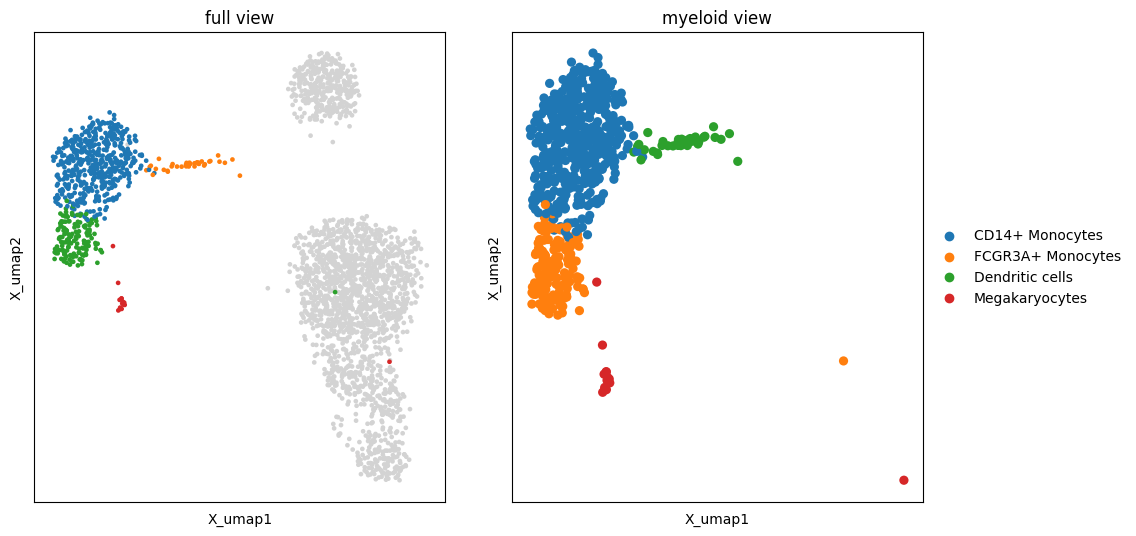

In [164]:
multiview_embedding(mvatlas, view='myeloid', color='louvain')

In [ ]:
def get_view_adata(mdata, view) -> AnnData:
    '''Getter from multi-view atlas.

    Returns:
    --------
    adata: AnnData
        anndata object for single view, with adata.X and adata.var taken from the full view
    '''
    mdata['']

    

In [154]:
v = 'NKT cells'
view_str = pd.json_normalize(view_hierarchy).columns.tolist()
for s in view_str:
    view_hierarchy = np.array(s.split('.'))
    parent_view = [view_hierarchy[i-1] for i,v1 in enumerate(view_hierarchy) if v == v1]

In [156]:
view_hierarchy

array(['lymphoid', 'B cells'], dtype='<U8')

In [141]:
len(view_hierarchy)

2